In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
# loading the data
X = pd.read_csv("Training Data/Logistic_X_Train.csv").values
y = pd.read_csv("Training Data/Logistic_Y_Train.csv").values

# Basic Visualization

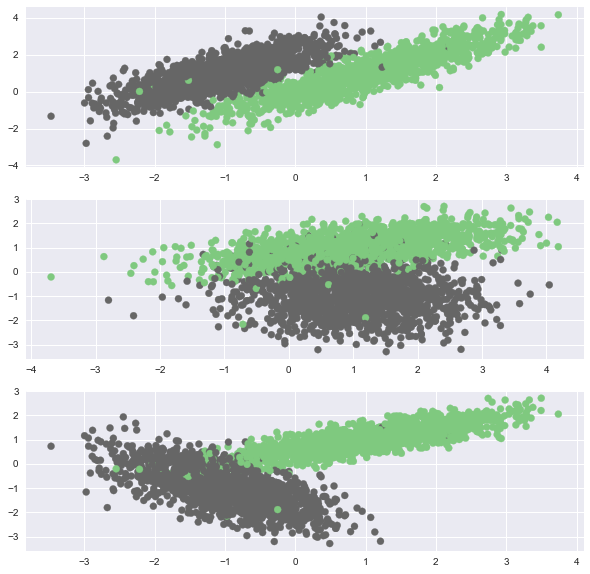

In [54]:
plt.figure(figsize=(10,10))
plt.style.use("seaborn")
plt.subplot(3,1,1)
plt.scatter(X[:,0],X[:,1],c=y,cmap = plt.cm.Accent)

plt.subplot(3,1,2)
plt.scatter(X[:,1],X[:,2],c=y,cmap = plt.cm.Accent)

plt.subplot(3,1,3)
plt.scatter(X[:,0],X[:,2],c=y,cmap = plt.cm.Accent)


<Figure size 576x396 with 0 Axes>

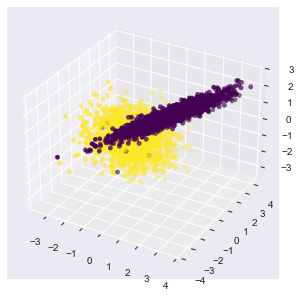

In [81]:
from mpl_toolkits import mplot3d
fig = plt.figure()
plt.figure(figsize=(5,5))
ax = plt.axes(projection ='3d')
ax.scatter3D(X[:,0], X[:,1], X[:,2],c=y,cmap = plt.cm.viridis)
plt.show()

<hr>
<b>linearly seperable</b>

<img src="./linearly_seperable.png" width="500" height="500" align="left">

# Train Test split

In [96]:
data = np.hstack((X, y))
np.random.shuffle(data)

In [98]:
split = int(0.8*data.shape[0])
X_train = data[:split,:-1]
X_test  = data[split:,:-1]

y_train = data[:split,-1]
y_test  = data[split:,-1]

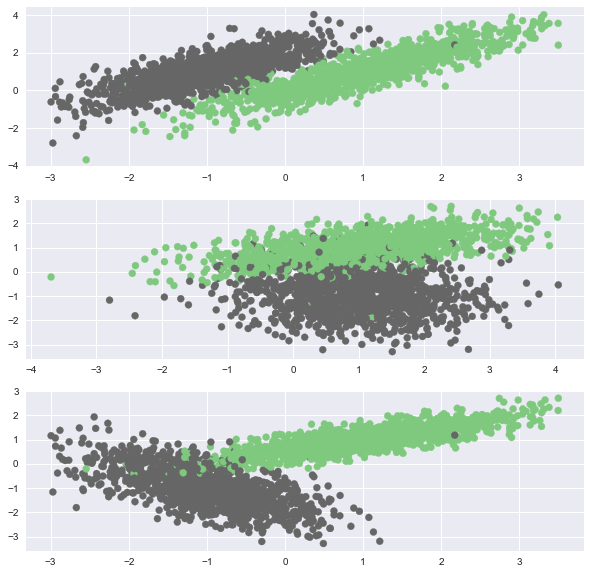

In [102]:
plt.figure(figsize=(10,10))
plt.style.use("seaborn")
plt.subplot(3,1,1)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap = plt.cm.Accent)

plt.subplot(3,1,2)
plt.scatter(X_train[:,1],X_train[:,2],c=y_train,cmap = plt.cm.Accent)

plt.subplot(3,1,3)
plt.scatter(X_train[:,0],X_train[:,2],c=y_train,cmap = plt.cm.Accent)

# Data Normalization

In [104]:
x_mean = X_train.mean(axis =0)
x_std  = X_train.std(axis=0) 

X_train = (X_train-x_mean)/x_std

X_test = (X_test-x_mean)/x_std

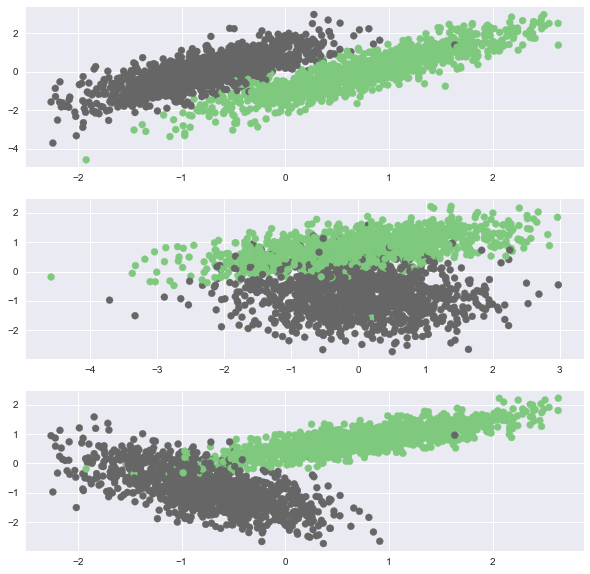

In [105]:
plt.figure(figsize=(10,10))
plt.style.use("seaborn")
plt.subplot(3,1,1)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap = plt.cm.Accent)

plt.subplot(3,1,2)
plt.scatter(X_train[:,1],X_train[:,2],c=y_train,cmap = plt.cm.Accent)

plt.subplot(3,1,3)
plt.scatter(X_train[:,0],X_train[:,2],c=y_train,cmap = plt.cm.Accent)

<Figure size 576x396 with 0 Axes>

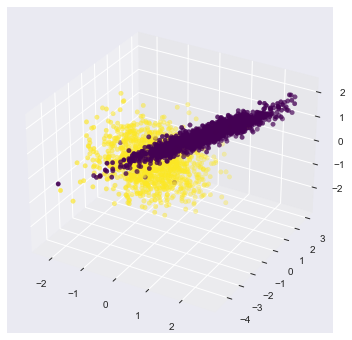

In [107]:
from mpl_toolkits import mplot3d
fig = plt.figure()
plt.figure(figsize=(6,6))
ax = plt.axes(projection ='3d')
ax.scatter3D(X_train[:,0], X_train[:,1], X_train[:,2],c=y_train,cmap = plt.cm.viridis)
plt.show()

# Logistic Regression 

In [108]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))


def hypothesis(X,theta):
    """
    X = entire array ( m,n+1)
    theta = np.array(n+1,1)
    """
    return sigmoid(np.dot(X,theta))
    

def error(X,y,theta):
    """
    params:
    X - (m,n+1)
    y - (m,1)
    theta - (n+1,1)
    return:
        scale_value = loss
    """
    hi = hypothesis(X,theta)
    e  = -1*np.mean((y*np.log(hi)+((1-y)*np.log(1-hi))))
    return e

In [109]:
def gradient(X,y,theta):
    """
    params:
    X = (m,n+1)
    y = (m,1)
    theta = (n+1,1)
    return :
        gradient_vector - (n+1,1)
    """
    hi = hypothesis(X,theta)
    grad = -np.dot(X.T,(y-hi))
    m = X.shape[0]
    return grad/m

def gradient_descent(X,y,lr=0.1,max_itr = 10000):
    n = X.shape[1]
    theta = np.zeros((n,1))
    
    error_list = []
    for i in range(max_itr):
        err = error(X,y,theta)
        error_list.append(err)

        grad = gradient(X,y,theta)
        
        #update 
        theta = theta-lr*grad
        if len(error_list)>=2 and (error_list[-2]-error_list[-1]) <0.00001:
            print("loop breaked at",i)
            break
    return (theta,error_list)

In [110]:
ones = np.ones((X_train.shape[0],1))
X_New_train = np.hstack((ones,X_train))
y_train = y_train.reshape((-1,1))

In [111]:
theta,error_list = gradient_descent(X_New_train,y_train)

loop breaked at 1291


# Visualization

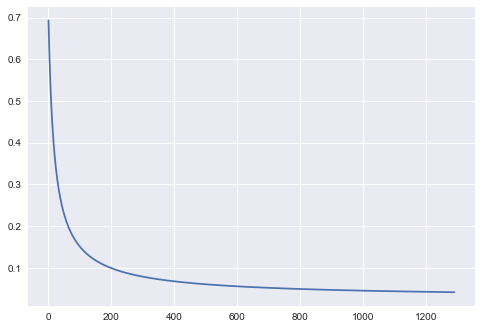

In [112]:
plt.plot(error_list)

#  Predictions

In [116]:
def predict(X,theta):
    h = hypothesis(X,theta)
    output = np.zeros(h.shape)
    output[h>=0.5] = 1 
    output = output.astype('int')
    return output

In [119]:
X_New_Test = np.hstack((np.ones((X_test.shape[0],1)),X_test))
X_train_preds = predict(X_New_train,theta)
X_test_preds = predict(X_New_Test,theta)

In [120]:
def accuracy(actual,preds):
    actual = actual.astype('int')
    actual = actual.reshape((-1,1))
    acc = (np.sum(actual == preds))/actual.shape[0]
    return acc*100

In [121]:
train_acc = accuracy(y_train,X_train_preds)
test_acc = accuracy(y_test,X_test_preds)
train_acc,test_acc

(99.45833333333334, 99.33333333333333)

# Assingment

In [149]:
X_exam = pd.read_csv("./Test Cases/Logistic_X_Test.csv").values
X_exam = (X_exam-x_mean)/x_std
ones = np.ones((X_exam.shape[0],1))
X_new_exam = np.hstack((ones,X_exam))

In [150]:
y_exam = predict(X_new_exam,theta)

In [151]:
df = pd.DataFrame(y_exam, columns=["label"])
df.to_csv("result.csv", index=False)

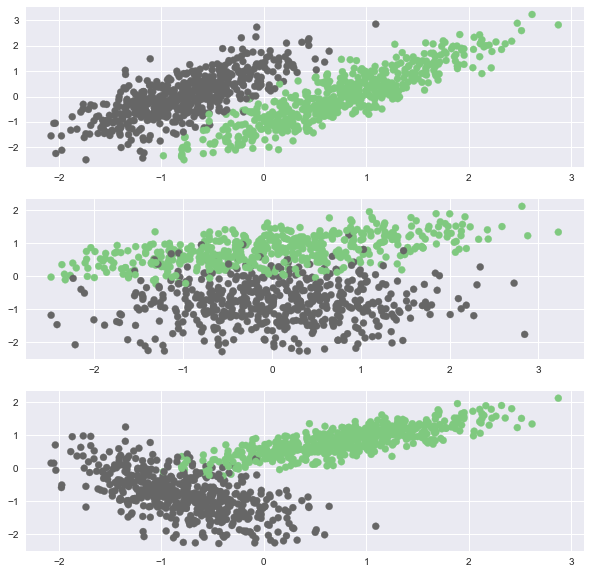

In [152]:
plt.figure(figsize=(10,10))
plt.style.use("seaborn")
plt.subplot(3,1,1)
plt.scatter(X_exam[:,0],X_exam[:,1],c=y_exam,cmap = plt.cm.Accent)

plt.subplot(3,1,2)
plt.scatter(X_exam[:,1],X_exam[:,2],c=y_exam,cmap = plt.cm.Accent)

plt.subplot(3,1,3)
plt.scatter(X_exam[:,0],X_exam[:,2],c=y_exam,cmap = plt.cm.Accent)

# By sk-learn

In [153]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
train_acc = model.score(X_train,y_train)
test_acc  = model.score(X_test,y_test)
y_pred = model.predict(X_test)
print(train_acc,test_acc)

0.9954166666666666 0.9933333333333333


/Users/kushidhar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [154]:
y_exam_sk = model.predict(X_exam)

In [162]:
y_exam_sk = y_exam_sk.reshape((-1,1))

In [163]:
np.sum(y_exam_sk == y_exam)/(y_exam.shape[0])

0.999

In [164]:
df = pd.DataFrame(y_exam_sk, columns=["label"])
df.to_csv("result2.csv", index=False)

In [165]:
df

label
0      1.0
1      1.0
2      0.0
3      1.0
4      1.0
..     ...
995    0.0
996    0.0
997    1.0
998    1.0
999    0.0

[1000 rows x 1 columns]